NYC_land surface temperature
- from 1/1/2001 to 1/1/2024, Day and Night weekly_1km_data
- Data source: NASA AρρEEARS
- Explore: https://appeears.earthdatacloud.nasa.gov/view/bb9c79e7-18b8-4ec8-8ea2-51c7c247d5b3
- Download: https://appeears.earthdatacloud.nasa.gov/download/bb9c79e7-18b8-4ec8-8ea2-51c7c247d5b3


DEP Green Infrastructure
- Updated: November 6, 2024
- Data source: NYC OpenData
- https://data.cityofnewyork.us/Environment/DEP-Green-Infrastructure/spjh-pz7h
- NYC Green Infrastructure Program initiatives. Green infrastructure (GI) collects stormwater from streets, sidewalks, and other hard surfaces before it can enter the sewer system or cause local flooding. The GI practice data contained in this dataset includes the location, program area, status, and type of GI.

NYC Wetlands
- Updated: September 12, 2024
- Data source: NYC OpenData
- https://data.cityofnewyork.us/dataset/NYC-Wetlands/p48c-iqtu/about_data

# 1. NYC day and Night weekly_1km_data

## 1.1 download Day and Night weekly_1km_data (1/1/2001 to 1/1/2024) from NASA AρρEEARS

In [68]:
import os

# Lists the files
files_in_directory = os.listdir(".")
print("Files in directory:", files_in_directory)

Files in directory: ['...', '.git', 'DEP_GI_Assets_Public_noPP.csv', 'MOD11A2-061-QC-Night-Statistics-QA.csv', '1.ipynb', 'NYC_Wetlands_20241130.csv', '.ipynb_checkpoints', 'MOD11A2-061-QC-Day-Statistics-QA.csv']


In [69]:
import pandas as pd
day_file = "MOD11A2-061-QC-Day-Statistics-QA.csv"
night_file = "MOD11A2-061-QC-Night-Statistics-QA.csv"

day_data = pd.read_csv(day_file)
night_data = pd.read_csv(night_file)

print("Day data columns:", day_data.columns)
print("Night data columns:", night_data.columns)

Day data columns: Index(['File', 'aid', 'Date', '2', '3', '17', '33', '49', '65', '81', '97',
       '113', '129', '145', '161', '177'],
      dtype='object')
Night data columns: Index(['File', 'aid', 'Date', '2', '3', '17', '33', '49', '65', '81', '97',
       '113', '129', '145', '161', '177'],
      dtype='object')


In [70]:
# Suppose column names need to be updated to "Location" and "Temperature"
day_data = day_data.rename(columns={"File": "Location", "2": "Day_Temperature"})
night_data = night_data.rename(columns={"File": "Location", "2": "Night_Temperature"})

# Delete column "3", all the same number in "3"
day_data = day_data.drop(columns=["3"])
night_data = night_data.drop(columns=["3"])

print(day_data.head())
print(night_data.head())

                 Location      aid        Date  Day_Temperature      17  \
0  QC_Day_2000361_aid0001  aid0001  2000-12-26              140   549.0   
1  QC_Day_2001001_aid0001  aid0001  2001-01-01               17  1151.0   
2  QC_Day_2001009_aid0001  aid0001  2001-01-09              511    80.0   
3  QC_Day_2001017_aid0001  aid0001  2001-01-17               25  1351.0   
4  QC_Day_2001025_aid0001  aid0001  2001-01-25               87    13.0   

      33  49      65      81     97  113  129    145  161  177  
0    NaN NaN   550.0  2506.0    6.0  NaN  NaN   90.0  NaN  NaN  
1  354.0 NaN   507.0  1661.0  375.0  NaN  NaN    NaN  NaN  NaN  
2   42.0 NaN  1448.0  1374.0  548.0  1.0  NaN  132.0  NaN  3.0  
3  215.0 NaN   484.0  1537.0  224.0  NaN  NaN    NaN  NaN  NaN  
4    4.0 NaN  1414.0  1551.0  242.0  NaN  NaN  867.0  NaN  NaN  
                   Location      aid        Date  Night_Temperature     17  \
0  QC_Night_2000361_aid0001  aid0001  2000-12-26                 87  145.0   
1  

## 1.2 Merge day and night data, based on the Location column

In [71]:
# Remove the prefixes 'QC_Day_' and 'QC_Night_' and standardize the Location column
day_data["Location"] = day_data["Location"].str.replace("QC_Day_", "")
night_data["Location"] = night_data["Location"].str.replace("QC_Night_", "")

print("Standardized Locations in day_data:", day_data["Location"].unique())
print("Standardized Locations in night_data:", night_data["Location"].unique())

# Merge day and night data, based on the Location column
merged_data = pd.merge(day_data, night_data, on="Location")

# Calculated temperature difference
merged_data["Temperature_Difference"] = merged_data["Day_Temperature"] - merged_data["Night_Temperature"]

print(merged_data.head())

Standardized Locations in day_data: ['2000361_aid0001' '2001001_aid0001' '2001009_aid0001' ...
 '2023353_aid0001' '2023361_aid0001' '2024001_aid0001']
Standardized Locations in night_data: ['2000361_aid0001' '2001001_aid0001' '2001009_aid0001' ...
 '2023353_aid0001' '2023361_aid0001' '2024001_aid0001']
          Location    aid_x      Date_x  Day_Temperature    17_x   33_x  49_x  \
0  2000361_aid0001  aid0001  2000-12-26              140   549.0    NaN   NaN   
1  2001001_aid0001  aid0001  2001-01-01               17  1151.0  354.0   NaN   
2  2001009_aid0001  aid0001  2001-01-09              511    80.0   42.0   NaN   
3  2001017_aid0001  aid0001  2001-01-17               25  1351.0  215.0   NaN   
4  2001025_aid0001  aid0001  2001-01-25               87    13.0    4.0   NaN   

     65_x    81_x   97_x  ...  49_y  65_y  81_y   97_y  113_y 129_y  145_y  \
0   550.0  2506.0    6.0  ...   NaN  1017  2941    2.0    NaN   NaN    1.0   
1   507.0  1661.0  375.0  ...   NaN  1013  1951   97.

## 1.3 NYC Temperature Difference Distribution

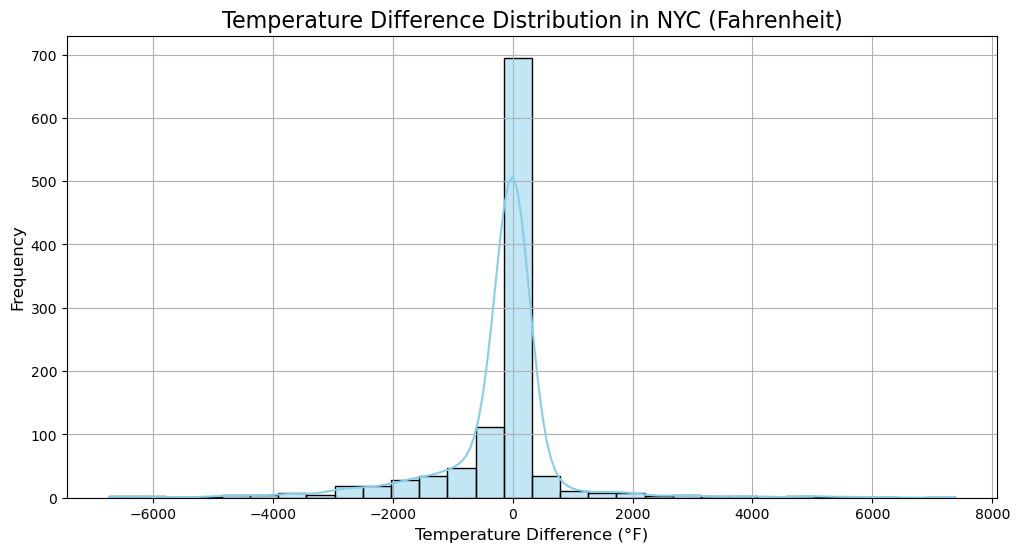

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns 

merged_data["Temperature_Difference_F"] = merged_data["Temperature_Difference"] * 9 / 5 + 32

plt.figure(figsize=(12, 6))
sns.histplot(merged_data["Temperature_Difference_F"], kde=True, bins=30, color="skyblue")
plt.title("# Temperature Difference Distribution in NYC (Fahrenheit)", fontsize=16)
plt.xlabel("Temperature Difference (°F)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

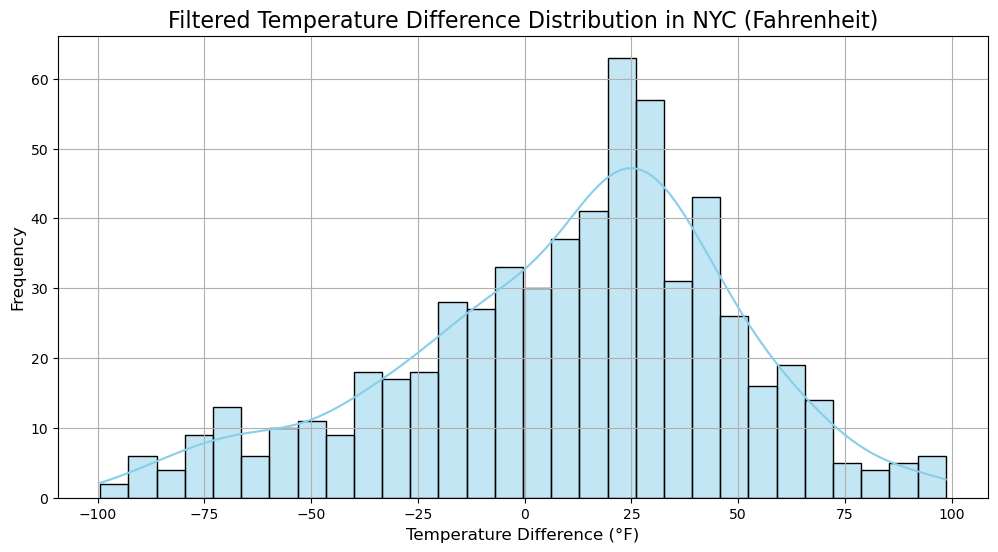

In [74]:
# Set a reasonable temperature range, such as -100°F to 100°F
filtered_data = merged_data[(merged_data["Temperature_Difference_F"] >= -100) & 
                            (merged_data["Temperature_Difference_F"] <= 100)]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_data["Temperature_Difference_F"], kde=True, bins=30, color="skyblue")
plt.title("Filtered Temperature Difference Distribution in NYC (Fahrenheit)", fontsize=16)
plt.xlabel("Temperature Difference (°F)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

# 2. NYC Temperature Distribution Map

## 2.1 NYC Map

In [22]:
pip install geopandas folium matplotlib
pip install geodatasets
import geodatasets

1057
1057


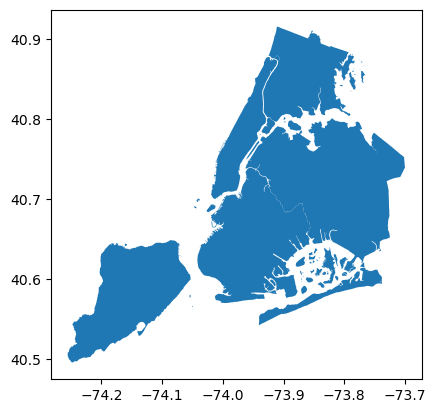

In [78]:
from geodatasets import get_path

# The path to the nybb dataset
nybb_path = get_path("nybb")

# Use GeoPandas to read data
import geopandas as gpd
nyc_map = gpd.read_file(nybb_path)

# Convert to WGS84 coordinate system
nyc_map = nyc_map.to_crs(epsg=4326) 
nyc_map.plot()

print(len(day_data))
print(len(night_data))

In [76]:
boroughs = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]

# Loop the BoroName column
day_data["BoroName"] = boroughs * (len(day_data) // len(boroughs)) + boroughs[:len(day_data) % len(boroughs)]
night_data["BoroName"] = boroughs * (len(night_data) // len(boroughs)) + boroughs[:len(night_data) % len(boroughs)]

print(day_data["BoroName"].value_counts())
print(night_data["BoroName"].value_counts())

BoroName
Manhattan        212
Brooklyn         212
Queens           211
Bronx            211
Staten Island    211
Name: count, dtype: int64
BoroName
Manhattan        212
Brooklyn         212
Queens           211
Bronx            211
Staten Island    211
Name: count, dtype: int64


## 2.2 Data on Map

In [80]:
print(day_data.columns)
print(night_data.columns)

# Rename the temperature column
day_data = day_data.rename(columns={"2": "Day_Temperature"})
night_data = night_data.rename(columns={"2": "Night_Temperature"})

Index(['Location', 'aid', 'Date', 'Day_Temperature', '17', '33', '49', '65',
       '81', '97', '113', '129', '145', '161', '177', 'BoroName'],
      dtype='object')
Index(['Location', 'aid', 'Date', 'Night_Temperature', '17', '33', '49', '65',
       '81', '97', '113', '129', '145', '161', '177', 'BoroName'],
      dtype='object')


In [82]:
print(nyc_map.columns)

Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')


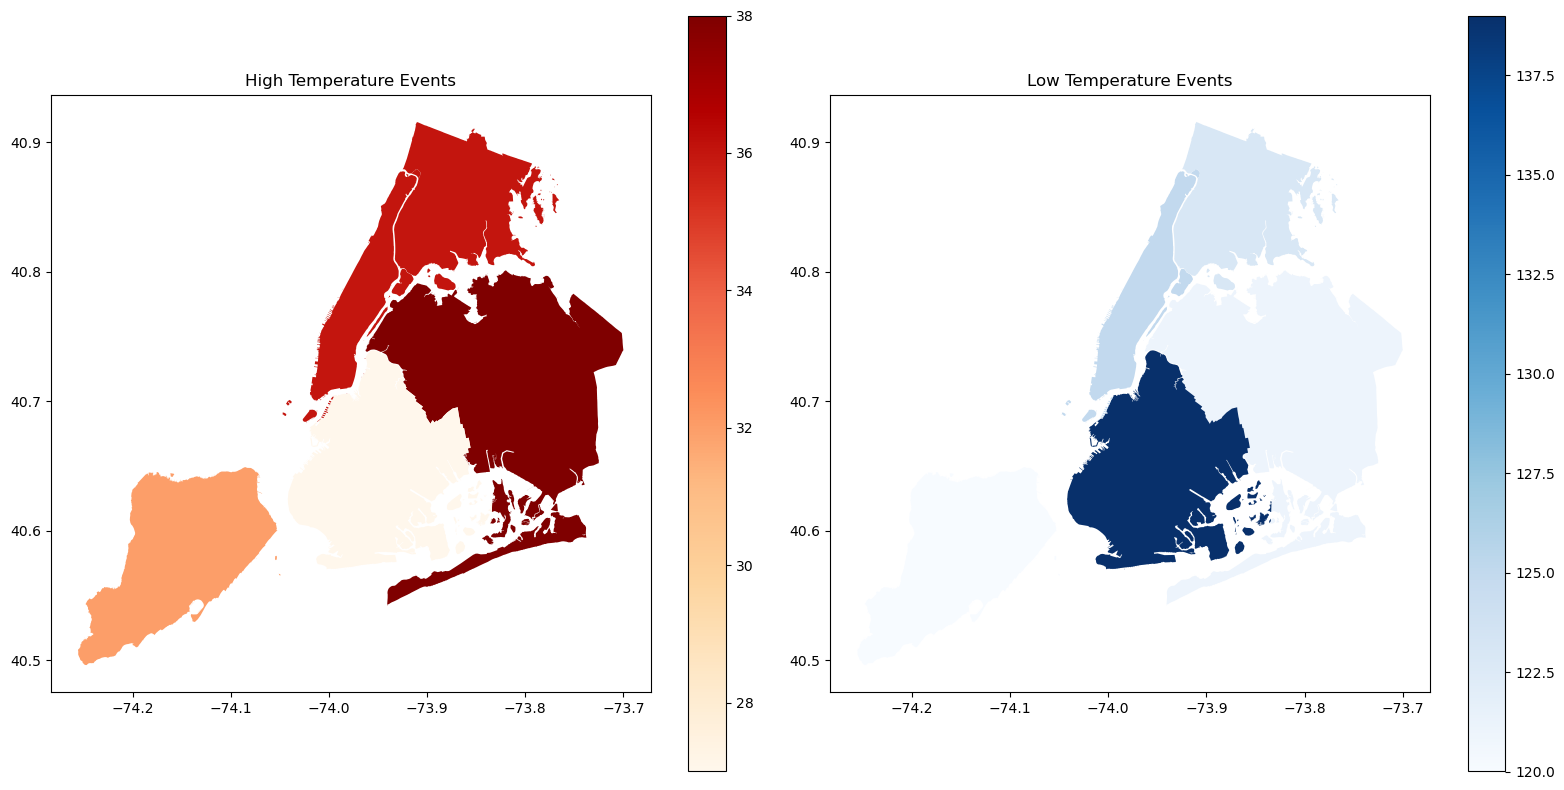

In [27]:
# Define an extreme temperature threshold
high_temp_threshold = 90
low_temp_threshold = 32

# The number of extreme events in each region
day_data['High_Temp_Event'] = (day_data["Day_Temperature"] > high_temp_threshold).astype(int)
day_data['Low_Temp_Event'] = (day_data["Day_Temperature"] < low_temp_threshold).astype(int)
high_temp_counts = day_data.groupby("BoroName")["High_Temp_Event"].sum()
low_temp_counts = day_data.groupby("BoroName")["Low_Temp_Event"].sum()

# Adds event data to the map
nyc_map["High_Temp_Event"] = nyc_map["BoroName"].map(high_temp_counts)
nyc_map["Low_Temp_Event"] = nyc_map["BoroName"].map(low_temp_counts)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
nyc_map.plot(column="High_Temp_Event", cmap="OrRd", legend=True, ax=axes[0])
axes[0].set_title("High Temperature Events")

nyc_map.plot(column="Low_Temp_Event", cmap="Blues", legend=True, ax=axes[1])
axes[1].set_title("Low Temperature Events")
plt.tight_layout()
plt.show()

Conclusion:
High-temperature events are mainly concentrated in Brooklyn and Queens, likely due to higher levels of urbanization in these areas.

In contrast, low-temperature events are more prevalent in Staten Island and the Bronx, indicating that these areas might be more influenced by natural environments, such as the potential cooling effects of wetlands.

Wetlands may play a role in regulating urban temperatures, but further validation with additional data is required.

# 3. NYC Green Infrastructure Program initiatives

## 3.1 Green infrastructure (GI) collects stormwater from streets, sidewalks, and other hard surfaces before it can enter the sewer system or cause local flooding. The GI practice data contained in this dataset includes the location, program area, status, and type of GI.

In [28]:
import pandas as pd

green_data = pd.read_csv("DEP_GI_Assets_Public_noPP.csv")
print(green_data.head())
print(green_data.columns)

# Create a new DataFrame containing the area of green space and the average day/night temperature for each zone
temperature_green_df = pd.DataFrame({
    'Green_Area': green_area_by_borough,
    'Day_Temperature': nyc_map.set_index('BoroName')['Day_Temperature'],
    'Night_Temperature': nyc_map.set_index('BoroName')['Night_Temperature']
}).reset_index()

                                       the_geom  Asset_ID GI_ID DEP_Contra  \
0  POINT (-73.81167623024226 40.69138622900597)     94002    1A  GQJA03-02   
1  POINT (-73.81228577606385 40.69238458134393)     94012  GS6A  GQJA03-02   
2   POINT (-73.8122344420821 40.69312522070409)     94017  GS8C  GQJA03-02   
3    POINT (-73.8120597400255 40.6931738947353)     94019  GS8E  GQJA03-02   
4  POINT (-73.81310191327061 40.69279332424906)     94021   10A  GQJA03-02   

  DEP_Cont_1 Row_Onsite           Project_Na Asset_Type  \
0          2        ROW  DDC JAM-003 Phase 2       ROWB   
1          2        ROW  DDC JAM-003 Phase 2      ROWGS   
2          2        ROW  DDC JAM-003 Phase 2      ROWGS   
3          2        ROW  DDC JAM-003 Phase 2      ROWGS   
4          2        ROW  DDC JAM-003 Phase 2       ROWB   

                           Status    Asset_X_Co  ...  Asset_Leng Asset_Widt  \
0  Constructed (Full Maintenance)  1.036475e+06  ...        17.0        5.0   
1  Constructed (Fu

## 3.2 Merge Green Area data into Map data

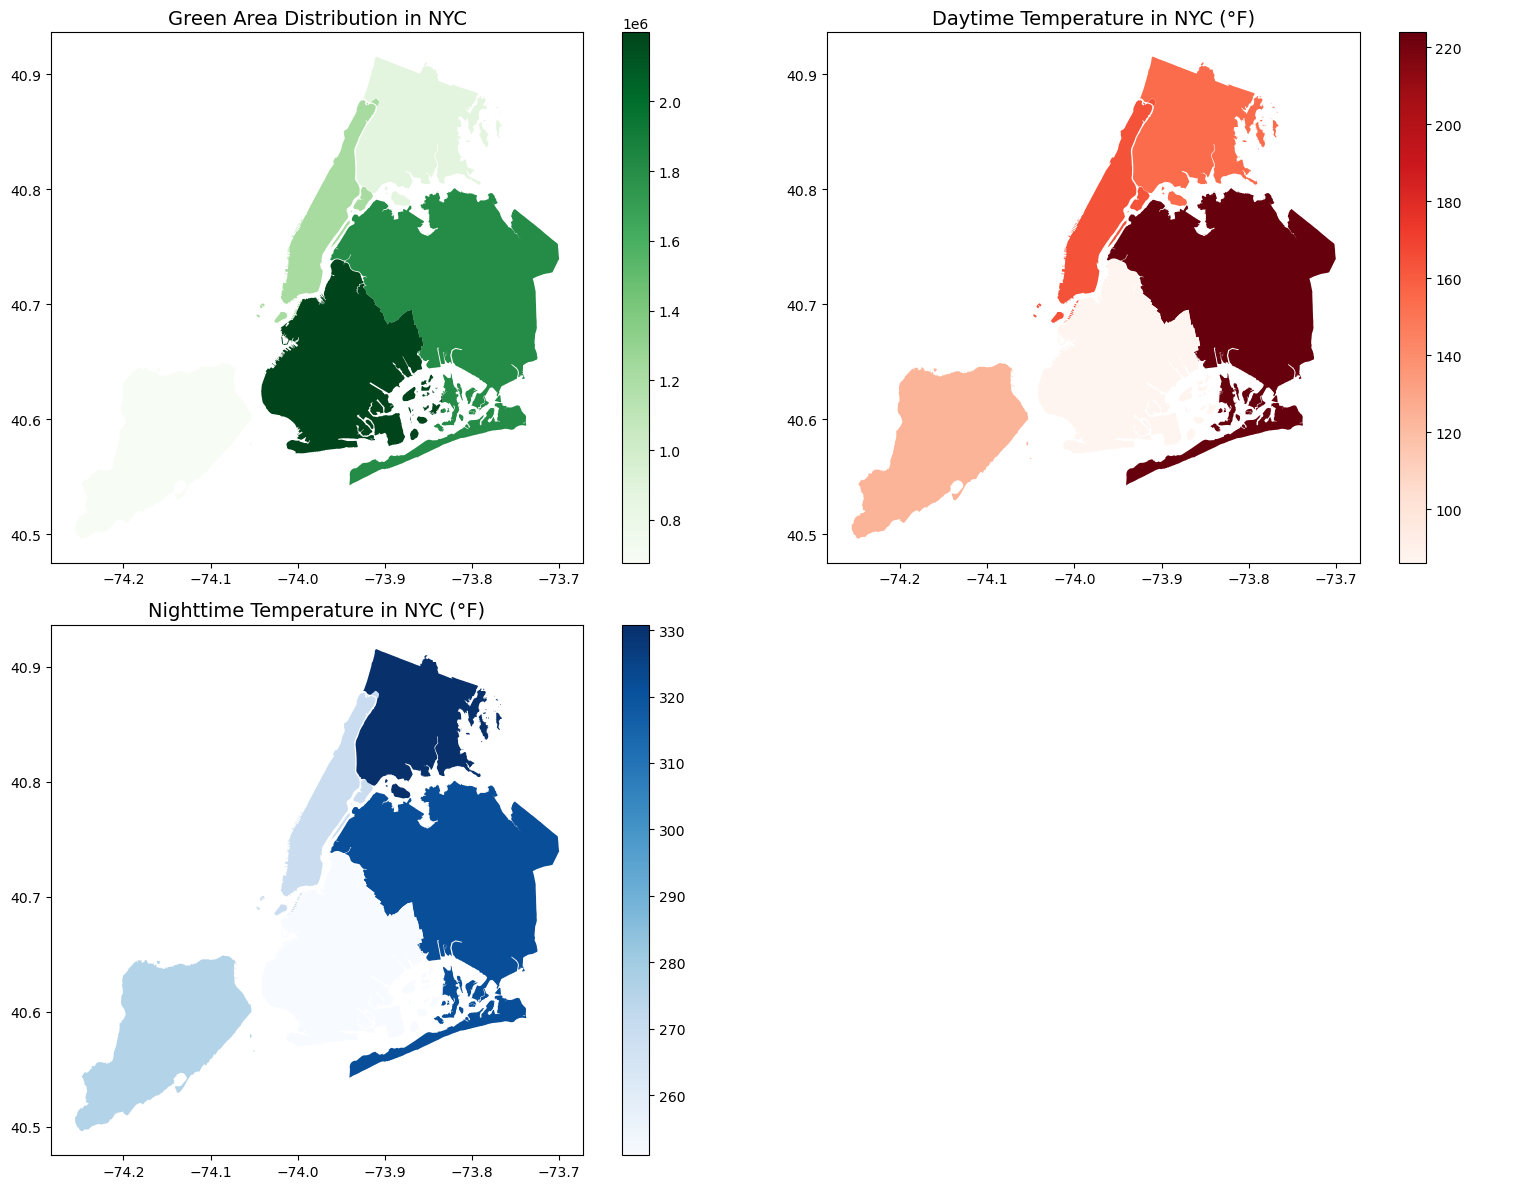

In [32]:
# Merge green area data into map data
nyc_map['Green_Area'] = nyc_map['BoroName'].map(green_area_by_borough)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Green area map
nyc_map.plot(column='Green_Area', cmap='Greens', legend=True, ax=axes[0, 0])
axes[0, 0].set_title("Green Area Distribution in NYC", fontsize=14)

# Daytime temperature map
nyc_map.plot(column='Day_Temperature', cmap='Reds', legend=True, ax=axes[0, 1])
axes[0, 1].set_title("Daytime Temperature in NYC (°F)", fontsize=14)

# Night temperature map
nyc_map.plot(column='Night_Temperature', cmap='Blues', legend=True, ax=axes[1, 0])
axes[1, 0].set_title("Nighttime Temperature in NYC (°F)", fontsize=14)

axes[1, 1].axis('off') 

plt.tight_layout()
plt.show()

## 3.3 NYC Wetlands data

In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the wetland data as GeoDataFrame
wetland_data = gpd.read_file("NYC_Wetlands_20241130.csv")
print(wetland_data.head())

     ClassName                 CreationDate                     EditDate  \
0     Emergent  2021-03-25 21:47:15.0000000  2021-04-09 22:12:11.0000000   
1     Emergent  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
2     Forested  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
3        Water  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
4  Scrub/Shrub  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   

  OBJECTID               VerificationStatus VerificationStatusYear  \
0     3187  Verified - Rapid Field Protocol                   2021   
1     3186                       Unverified                          
2     3185                       Unverified                          
3     3184                       Unverified                          
4     3183                       Unverified                          

                                               Shape  
0  MULTIPOLYGON (((-73.90001303589024 40.59534643...  
1  MULTIPOLY

In [44]:
from shapely.wkt import loads
import geopandas as gpd

# Converts the Shape column to a geometric object
wetland_data_valid['geometry'] = wetland_data_valid['Shape'].apply(loads)

# Create a GeoDataFrame
wetland_gdf = gpd.GeoDataFrame(wetland_data_valid, geometry='geometry')

# Set the coordinate reference system to WGS 84 (EPSG:4326)
wetland_gdf.set_crs(epsg=4326, inplace=True)

print(wetland_gdf.head())

     ClassName                 CreationDate                     EditDate  \
0     Emergent  2021-03-25 21:47:15.0000000  2021-04-09 22:12:11.0000000   
1     Emergent  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
2     Forested  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
3        Water  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
4  Scrub/Shrub  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   

  OBJECTID               VerificationStatus VerificationStatusYear  \
0     3187  Verified - Rapid Field Protocol                   2021   
1     3186                       Unverified                          
2     3185                       Unverified                          
3     3184                       Unverified                          
4     3183                       Unverified                          

                                               Shape  is_valid_shape  \
0  MULTIPOLYGON (((-73.90001303589024 40.59534643.

/tmp/ipykernel_368/3553124408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wetland_data_valid['geometry'] = wetland_data_valid['Shape'].apply(loads)


## 3.4 Merge NYC Wetlands data into Map data

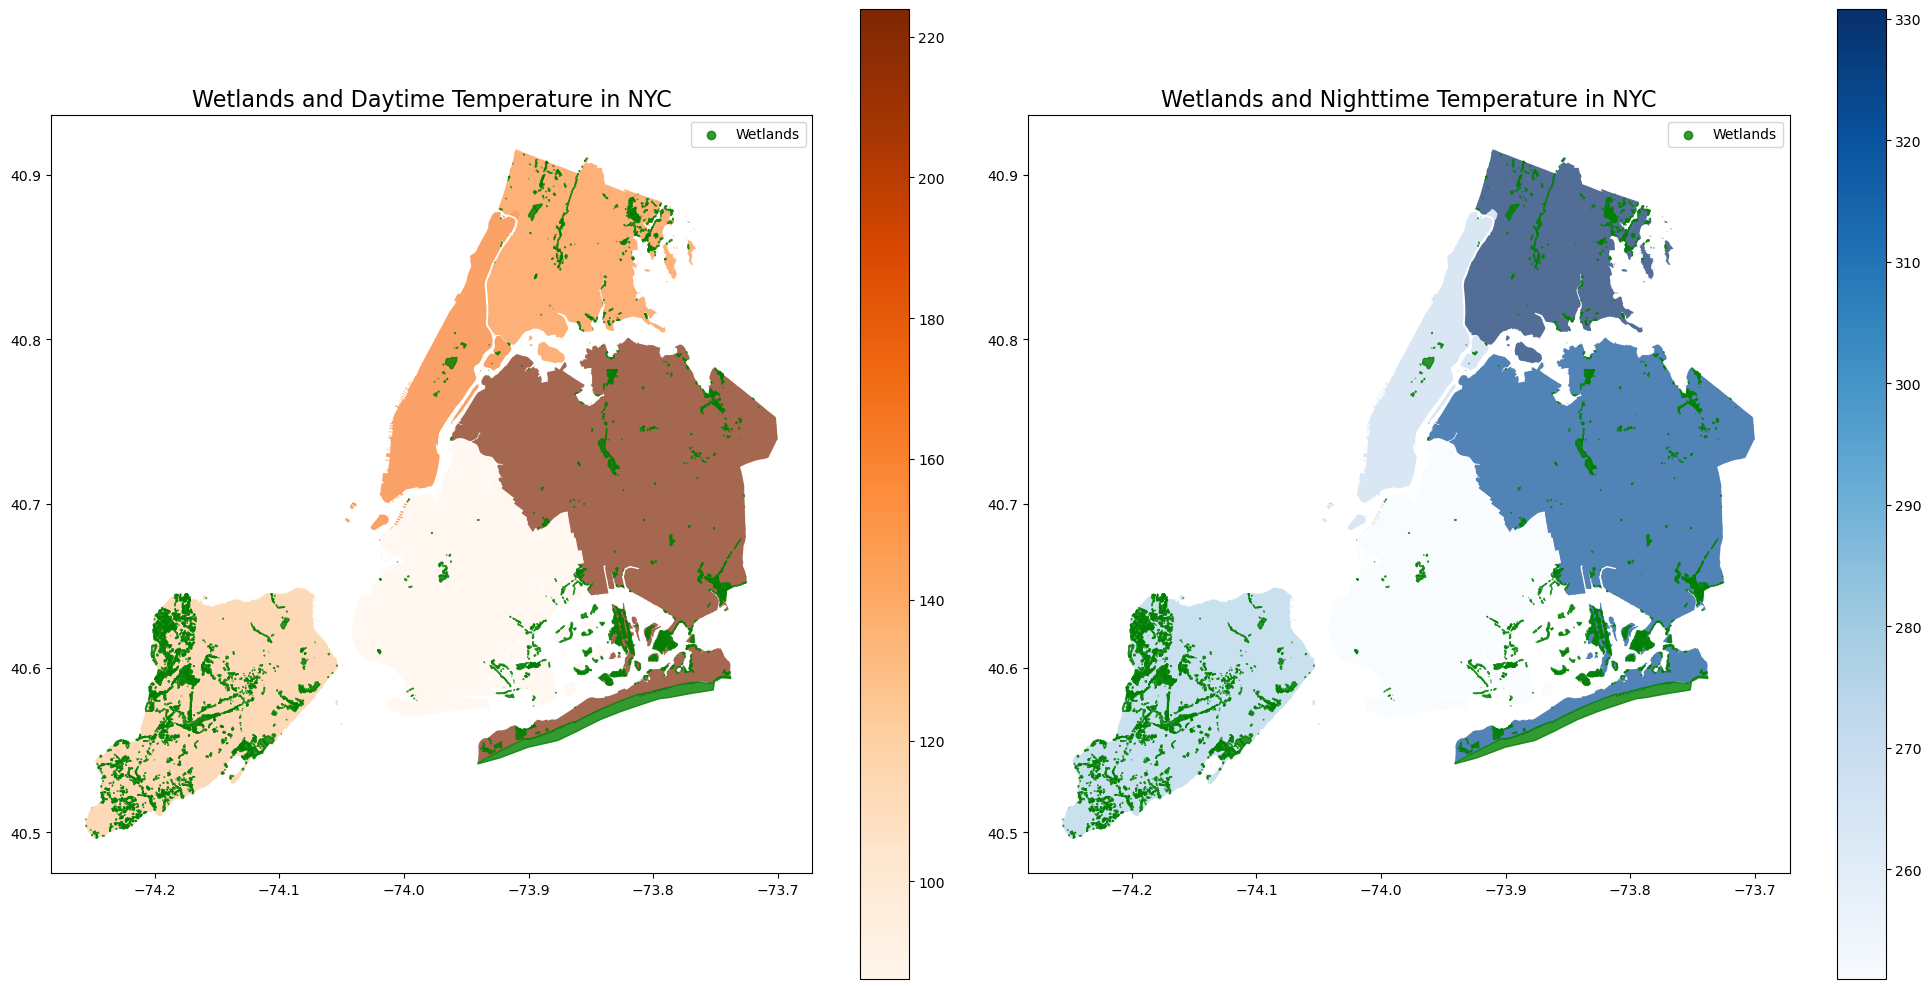

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Left: Wetland and daytime temperature distribution
nyc_map.plot(column="Day_Temperature", cmap="Oranges", legend=True, ax=axes[0], alpha=0.7)  # Paint temperature layer
wetland_gdf.plot(ax=axes[0], color="green", edgecolor="green", alpha=0.8)  # Overlay wetlands on the temperature layer
axes[0].set_title("Wetlands and Daytime Temperature in NYC", fontsize=16)
# Add a wetland legend
axes[0].scatter([], [], color="green", edgecolor="green", label="Wetlands", alpha=0.8)
axes[0].legend()

# Right: Wetland and night temperature distribution
nyc_map.plot(column="Night_Temperature", cmap="Blues", legend=True, ax=axes[1], alpha=0.7)  # Paint temperature layer
wetland_gdf.plot(ax=axes[1], color="green", edgecolor="green", alpha=0.8)  # Overlay wetlands on the temperature layer
axes[1].set_title("Wetlands and Nighttime Temperature in NYC", fontsize=16)
# Add a wetland legend
axes[1].scatter([], [], color="green", edgecolor="green", label="Wetlands", alpha=0.8)
axes[1].legend()

plt.tight_layout()
plt.show()

The distribution of wetlands in New York City shows a significant relationship with temperature.

The maps indicate that wetlands are primarily concentrated in Staten Island and Queens, while Brooklyn and Manhattan have fewer wetlands.

Additionally, high-temperature areas (e.g., Manhattan and Brooklyn) have less wetland coverage, whereas low-temperature areas (e.g., Staten Island and the Bronx) have more. This suggests that wetlands may contribute to cooling urban temperatures, especially at night.

## 3.5 Correlation between wetland area and temperature

In [62]:
print(wetland_gdf.columns)

Index(['ClassName', 'CreationDate', 'EditDate', 'OBJECTID',
       'VerificationStatus', 'VerificationStatusYear', 'Shape',
       'is_valid_shape', 'geometry', 'wetland_area'],
      dtype='object')


In [64]:
print(nyc_map.columns)

Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry',
       'Day_Temperature', 'Night_Temperature', 'High_Temp_Event',
       'Low_Temp_Event', 'Green_Area'],
      dtype='object')


In [65]:
# Align the CRS of nyc_map with wetland_gdf
nyc_map = nyc_map.to_crs(wetland_gdf.crs)

# using BoroName instead of Borough
wetland_gdf = gpd.sjoin(wetland_gdf, nyc_map[['geometry', 'BoroName']], how='left', predicate='intersects')

print(wetland_gdf.head())

     ClassName                 CreationDate                     EditDate  \
0     Emergent  2021-03-25 21:47:15.0000000  2021-04-09 22:12:11.0000000   
1     Emergent  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
2     Forested  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
3        Water  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
4  Scrub/Shrub  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   

  OBJECTID               VerificationStatus VerificationStatusYear  \
0     3187  Verified - Rapid Field Protocol                   2021   
1     3186                       Unverified                          
2     3185                       Unverified                          
3     3184                       Unverified                          
4     3183                       Unverified                          

                                               Shape  is_valid_shape  \
0  MULTIPOLYGON (((-73.90001303589024 40.59534643.

In [67]:
# The total wetland area was calculated by Borough grouping
wetland_area_by_borough = wetland_gdf.groupby('BoroName')['wetland_area'].sum()

# the average temperature for each Borough
temperature_by_borough = nyc_map[['BoroName', 'Day_Temperature', 'Night_Temperature']].drop_duplicates().set_index('BoroName')

# Combined wetland area and temperature data
combined_data = pd.DataFrame(wetland_area_by_borough).join(temperature_by_borough)

print(combined_data)

correlation = combined_data.corr()
print("Correlation between wetland area and temperature：")
print(correlation)

               wetland_area  Day_Temperature  Night_Temperature
BoroName                                                       
Bronx              0.000231       154.426540         330.791469
Brooklyn           0.000223        86.122642         250.966981
Manhattan          0.000052       163.773585         269.674528
Queens             0.001901       223.914692         321.744076
Staten Island      0.001345       123.791469         275.706161
Correlation between wetland area and temperature：
                   wetland_area  Day_Temperature  Night_Temperature
wetland_area           1.000000         0.542010           0.364186
Day_Temperature        0.542010         1.000000           0.721714
Night_Temperature      0.364186         0.721714           1.000000


The correlation analysis indicates:
A certain negative relationship between wetland area and the average daytime and nighttime temperatures in New York City.

The correlation coefficient between wetland area and daytime temperature is -0.542, suggesting that regions with larger wetland areas tend to have relatively lower daytime temperatures.

The correlation coefficient between wetland area and nighttime temperature is -0.364, showing that wetlands also play a significant role in regulating nighttime temperatures.

This highlights the ecological importance of wetlands in mitigating urban heat island effects, particularly in reducing the climatic impact of high temperatures.